# CD7 gating cells of interest

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [3]:
from ehv.masking import plot_scip_segmentation
from ehv.core import plot_gate_czi

from sklearn.preprocessing import scale
import flowutils
from matplotlib.path import Path as mPath
from matplotlib.patches import Polygon

In [4]:
data_dir = Path("/data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/results/scip/202203221745/")

df = pq.read_table(data_dir / "features.parquet").to_pandas()

df = df.set_index(["meta_panel", "meta_replicate", "meta_P", "meta_id"])
df = df.loc["D"]
df = df.loc[numpy.load(data_dir / "index.npy", allow_pickle=True)]
df = df.sort_index()

In [5]:
df.shape

(34718, 1494)

# Gating

In [6]:
def asinh_scale(x, t):
    return scale(flowutils.transforms.asinh(x, channel_indices=None, t=t, m=4.5, a=1), with_std=False)

In [7]:
fluor_df = df.groupby(
    ["meta_replicate", "meta_P"]
)[
    ["feat_sum_DAPI", "feat_sum_RPe", "feat_sum_EGFP", "feat_sum_APC"]
].transform(lambda x: asinh_scale(x, df["feat_sum_" + x.name.split("_")[-1]].max()))

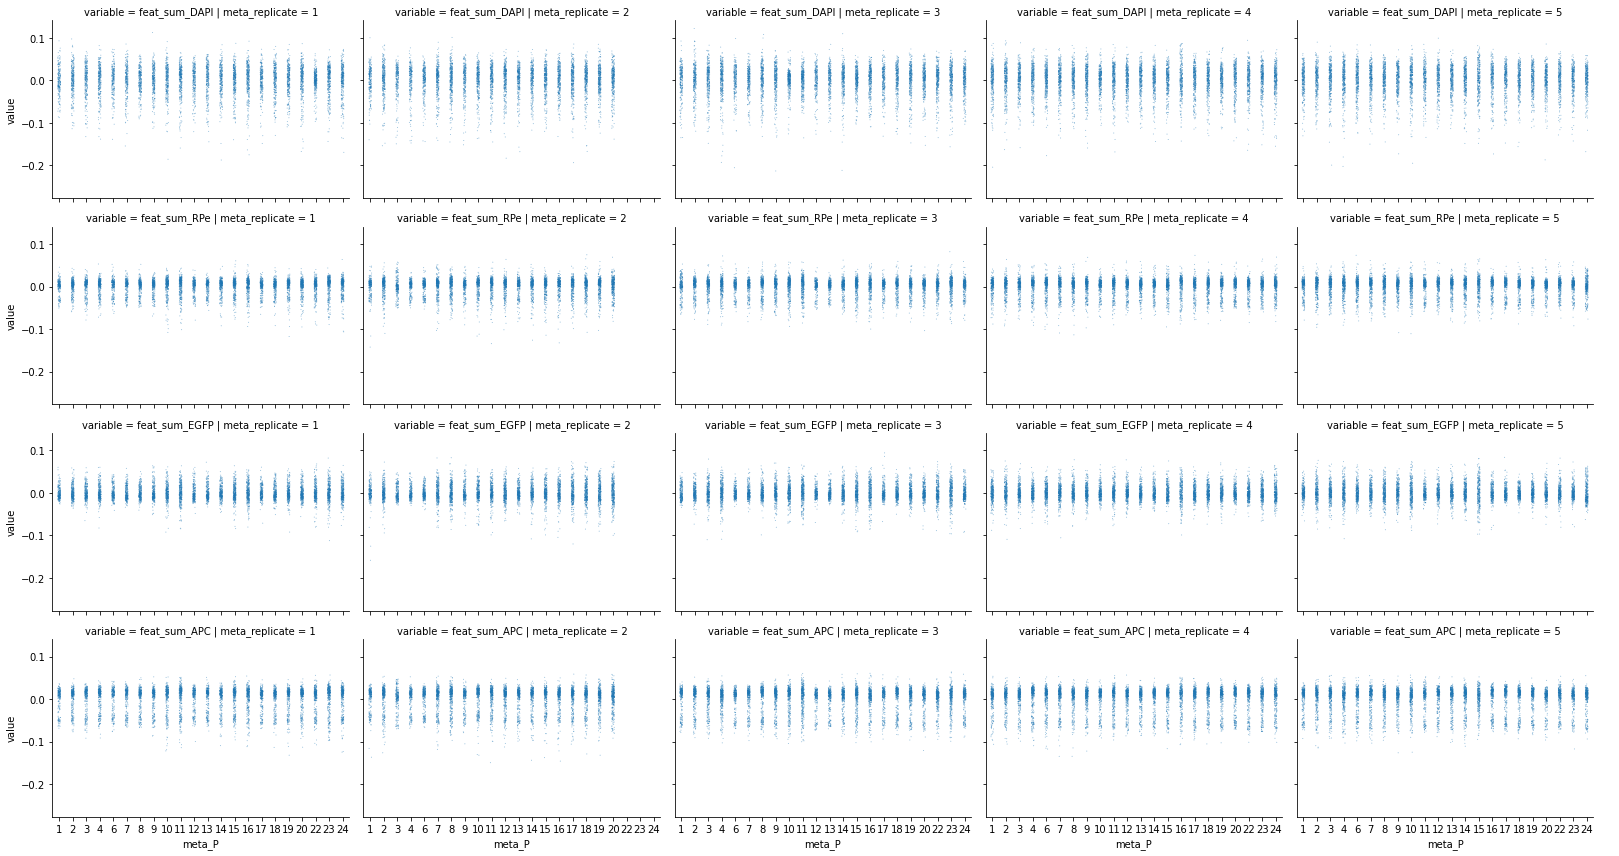

In [8]:
melted_df = pandas.melt(fluor_df.reset_index(), id_vars=["meta_P", "meta_replicate"], value_vars=fluor_df.columns)
grid = seaborn.FacetGrid(data=melted_df, col="meta_replicate", row="variable", sharey=True, aspect=1.5)
grid.map_dataframe(seaborn.stripplot, x="meta_P", y="value", size=1, alpha=0.5)
grid.add_legend()

## DAPI

<AxesSubplot:xlabel='feat_sum_DAPI', ylabel='Count'>

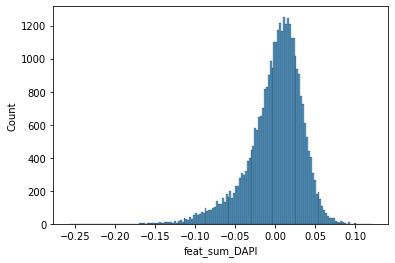

In [9]:
seaborn.histplot(data=fluor_df.reset_index(), x="feat_sum_DAPI")

0 P11-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P13-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P13-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P17-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P19-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P19-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P21-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P24-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P24-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P4-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P5-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P7-D3 /data/gent/vo/000/gvo0

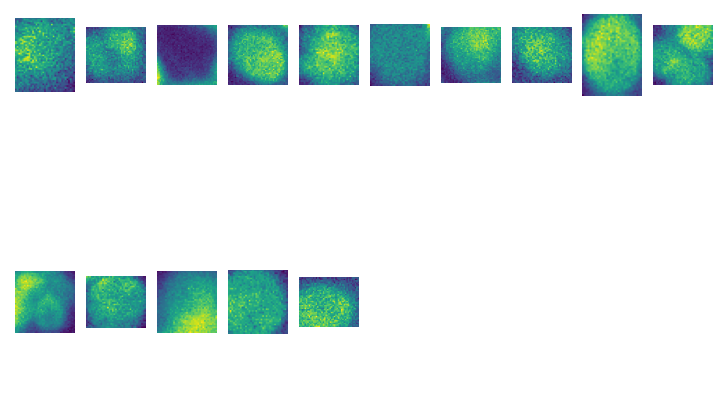

In [253]:
sel1 = fluor_df["feat_sum_DAPI"] < -0.1
plot_gate_czi(sel1, df, maxn=15, channel=0)

0 P10-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P18-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P2-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P22-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P24-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P4-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P5-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P5-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P7-D4 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P7-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P8-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P8-D4 /data/gent/vo/000/gvo00070/

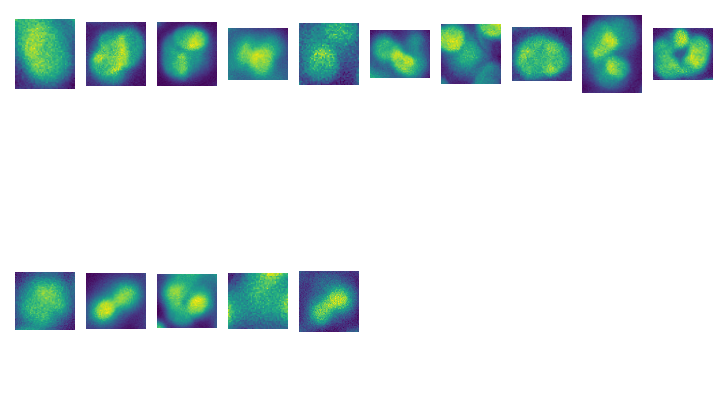

In [254]:
sel1 = fluor_df["feat_sum_DAPI"] < 0.1
sel2 = fluor_df["feat_sum_DAPI"] > -0.1
plot_gate_czi(sel1 & sel2, df, maxn=15, channel=0)

0 P10-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P12-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P14-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P2-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P22-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P24-D5 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P25-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P25-D2 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P3-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P4-D1 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P7-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P8-D3 /data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/Experiment-800.czi
0 P8-D4 /data/gent/vo/000/gvo0007

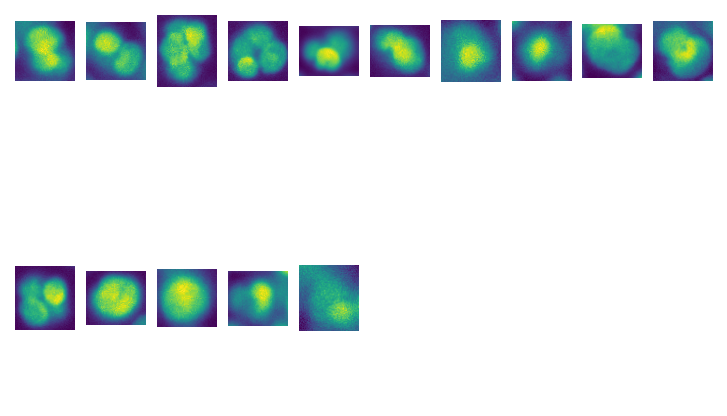

In [255]:
sel1 = asinh_dapi > 0.06
plot_gate_czi(sel1, df, maxn=15, channel=0)

## EGFP (CD45)

<AxesSubplot:xlabel='feat_sum_EGFP', ylabel='Count'>

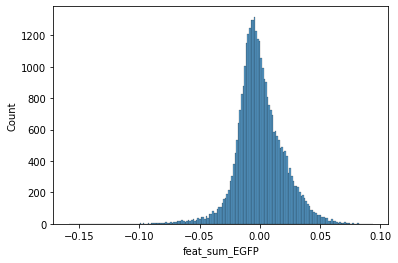

In [10]:
seaborn.histplot(data=fluor_df.reset_index(), x="feat_sum_EGFP")

### APC (CD15)

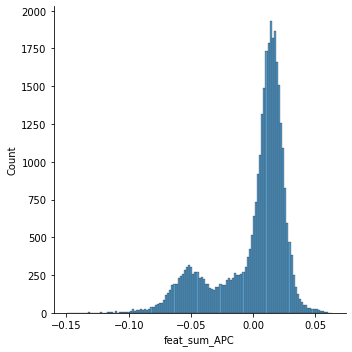

In [11]:
seaborn.displot(data=fluor_df.reset_index(), x="feat_sum_APC")

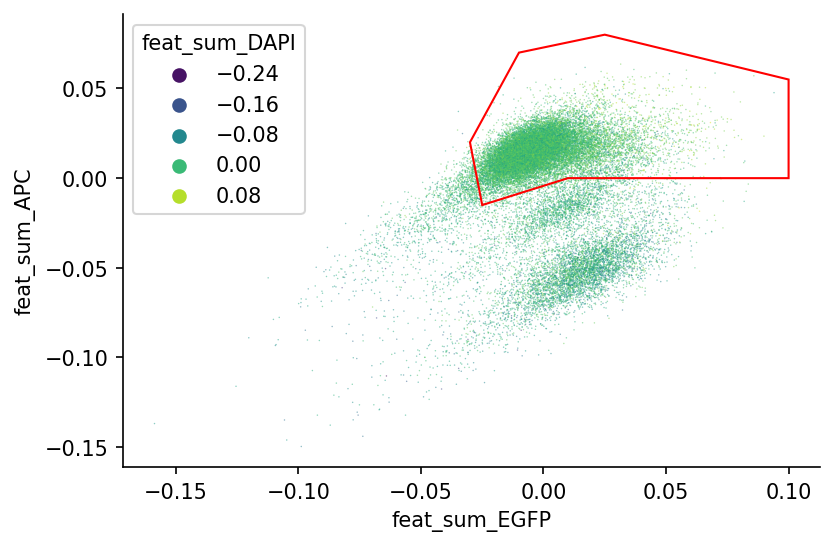

In [12]:
vertices = numpy.array([
    [-0.03, 0.02],
    [-0.01, 0.07],
    [0.025, 0.08],
    [0.1, 0.055],
    [0.1, 0.0],
    [0.01, 0.0],
    [-0.025, -0.015]
])
p = Polygon(vertices, facecolor = 'none', edgecolor="red")

fig, ax = plt.subplots(dpi=150)
seaborn.scatterplot(
    data=fluor_df, 
    x="feat_sum_EGFP", 
    y="feat_sum_APC", 
    hue="feat_sum_DAPI",
    palette="viridis",
    norm=tuple(df["feat_sum_DAPI"].quantile((0.05, 0.95))),
    s=0.5, alpha=0.5, edgecolor="none", ax=ax)
ax.add_patch(p)
seaborn.despine(fig)

In [13]:
path = mPath(vertices)
idx = path.contains_points(fluor_df[["feat_sum_EGFP", "feat_sum_APC"]])

In [14]:
sum(idx) / len(idx)

0.7171784088945216

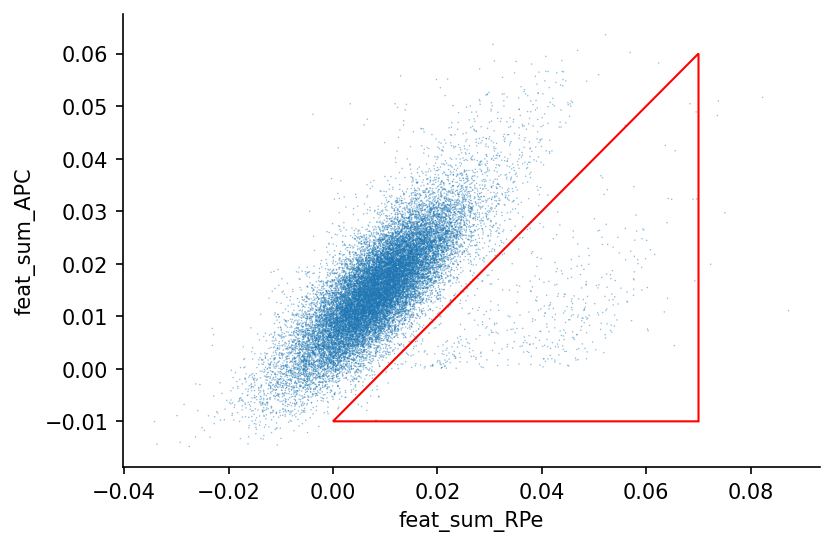

In [15]:
vertices = numpy.array([
    [0., -.01],
    [0.07, 0.06],
    [0.07, -.01]
])
p = Polygon(vertices, facecolor = 'none', edgecolor="red")

fig, ax = plt.subplots(dpi=150)
seaborn.scatterplot(
    data=fluor_df[idx],
    x="feat_sum_RPe", 
    y="feat_sum_APC", 
    s=0.5, alpha=0.5, edgecolor="none", ax=ax)
ax.add_patch(p)
seaborn.despine(fig)

In [16]:
path = mPath(vertices)
idx2 = ~path.contains_points(fluor_df[idx][["feat_sum_APC", "feat_sum_RPe"]])

In [17]:
len(fluor_df[idx][idx2]) / len(fluor_df)

0.5447894463966818

In [20]:
len(fluor_df[idx][idx2])

18914

In [30]:
data_dir

PosixPath('/data/gent/vo/000/gvo00070/vsc42015/datasets/cd7/800/results/scip/202203221745')

In [27]:
numpy.save(data_dir / "neutrophils.npy", fluor_df[idx][idx2].index)